<a id="top"></a>

# Characterizing M dwarf flares with HST II: Parsing and plotting

***

# Learning goals
By the end of this tutorial, you will:
- Understand how to plot image data from HST FITS files.
- Find sources on HST images.

# Introduction
The flare rate of M dwarfs — the lowest-mass stars that undergo nuclear fusion — has a broad class of science cases. Flare rates have ramifications for stellar physics (e.g., connections to stellar mass and rotation period) and exoplanet science (e.g., photochemistry and habitability). Time-series MAST data can be used to capture and constrain flares. 

This tutorial continues a series exploring how to use MAST data for such purposes. In this portion, we will plot data from the Hubble Space Telescope ([HST](https://archive.stsci.edu/missions-and-data/hst)) and find sources on the images.

# Imports
- numpy to help aggregate our metadata.
- matplotlib to plot our data
- sys (Python builtin) to read our machine's Python version.
- astroquery.mast to interact with MAST data products.
- astropy to provide data structures that organize our metadata, units functionality, and coordinates functionality.

In [9]:
# download the list
import pandas as pd

from astropy.coordinates import position_angle

import matplotlib.pyplot as plt

from urllib.error import HTTPError

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord


from astroquery.mast import Observations
import numpy as np

import astropy.io.fits as fits
from astropy.table import Table, vstack, unique

# Plotting HST data
It's tricky to plot images from FITS files.

In [47]:
ls mastDownload/HST/hst_12985_01_wfc3_uvis_f555w_ic3j01a8

hst_12985_01_wfc3_uvis_f555w_ic3j01a8_drc.fits
hst_12985_01_wfc3_uvis_f555w_ic3j01a8_flc.fits


In [51]:
ls mastDownload/HLA/hst_06310_09_wfpc2_f675w_pc_16

hst_06310_09_wfpc2_f675w_pc_16_drz.fits


In [98]:
file = 'mastDownload/HLA/hst_06310_09_wfpc2_f675w_pc_16/hst_06310_09_wfpc2_f675w_pc_16_drz.fits'

In [99]:
header = fits.getheader(file)
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  900                                                  
NAXIS2  =                  900                                                  
DATE    = '2006-12-18'         / date this file was written (yyyy-mm-dd)        
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFPC2 '             / identifier for instrument used to acquire data 
EQUINOX =               2000.0 / equinox of celestial coord. system             
                                                                                
              / WFPC-II DATA

In [100]:
data = fits.getdata(file)

In [106]:
np.unravel_index(data.argmax(), data.shape)

(735, 702)

In [123]:
from astropy.wcs import WCS
f = fits.open(file)
w = WCS(f[0].header)
sky = w.pixel_to_world(10, 0)
x, y = w.world_to_pixel(sky)
f.close()
print(sky)  

INFO: 
                Inconsistent SIP distortion information is present in the FITS header and the WCS object:
                SIP coefficients were detected, but CTYPE is missing a "-SIP" suffix.
                astropy.wcs is using the SIP distortion coefficients,
                therefore the coordinates calculated here might be incorrect.

                If you do not want to apply the SIP distortion coefficients,
                please remove the SIP coefficients from the FITS header or the
                WCS object.  As an example, if the image is already distortion-corrected
                (e.g., drizzled) then distortion components should not apply and the SIP
                coefficients should be removed.

                While the SIP distortion coefficients are being applied here, if that was indeed the intent,
                for consistency please append "-SIP" to the CTYPE in the FITS header or the WCS object.

                 [astropy.wcs.wcs]
<SkyCoord (FK5: equi

In [124]:
data.shape

(900, 900)

In [126]:
xs = []
for i in range(data.shape[0])[::100]:

    sky = w.pixel_to_world(i, 0)
    xs += [sky[0]]

TypeError: 'Longitude' object with a scalar value does not support indexing

In [129]:
# get the corners




sky1 = w.pixel_to_world(0, 0)

sky2 = w.pixel_to_world(data.shape[0], 0)

sky3 = w.pixel_to_world(0, data.shape[1])

sky4 = w.pixel_to_world(data.shape[0], data.shape[1])

In [131]:
sky1

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (217.49271238, -62.6976283)>

In [133]:
sky2

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (217.46583243, -62.69761472)>

In [135]:
sky3

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (217.49268023, -62.68530014)>

In [136]:
sky4

<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (217.46585998, -62.68531132)>

In [ ]:
ys = np.linspace()

The `.flc` files have not been geometrically corrected (through drizzle). As an example, we'll download this speccific file.

/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_88120/4271867660.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data))
/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_88120/4271867660.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(data))


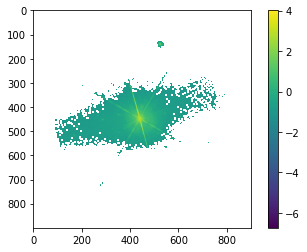

In [137]:
plt.imshow(np.log10(data))
plt.colorbar()


# as a check, slap that source on top of your image

/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_88120/37410237.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data), origin='lower', cmap='cividis', aspect='equal')
/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_88120/37410237.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(data), origin='lower', cmap='cividis', aspect='equal')


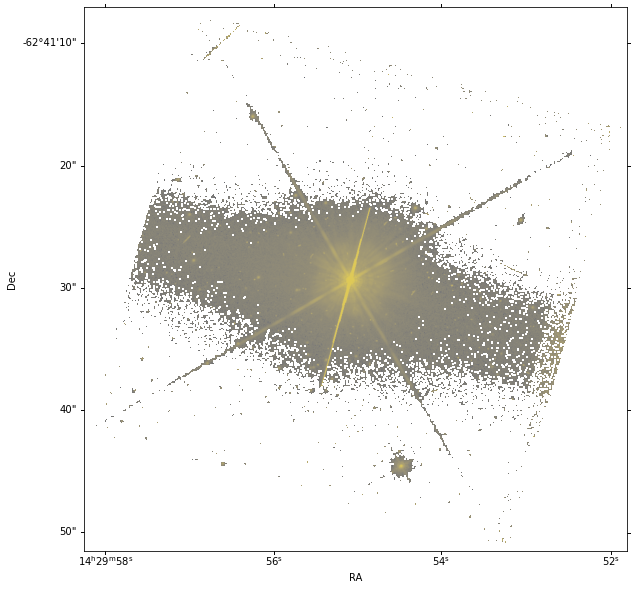

In [139]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=w)
plt.imshow(np.log10(data), origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

In [105]:
# todo: get RA and Dec coordinates instead of pixel coordinates from the wcs.

In [ ]:
# show using, e.g., photutils?

Note that this is a cut-out stamp. We can orient ourselves by using the wcs

In [17]:
from astropy import wcs

In [19]:
hdulist = fits.open(file)

# Parse the WCS keywords in the primary HDU
w = wcs.WCS(hdulist[0].header)

# Print out the "name" of the WCS, as defined in the FITS header
print(w.wcs.name)

# Print out all of the settings that were parsed from the header
w.wcs.print_contents()


In [21]:
w.wcs.print_contents()

       flag: 137
      naxis: 2
      crpix: 0x600000256b50
               0.0000       0.0000    
         pc: 0x600000067980
    pc[0][]:   1.0000       0.0000    
    pc[1][]:   0.0000       1.0000    
      cdelt: 0x600000256450
               1.0000       1.0000    
      crval: 0x600000256f30
               0.0000       0.0000    
      cunit: 0x600003250240
             ""
             ""
      ctype: 0x6000032502d0
             ""
             ""
    lonpole: UNDEFINED
    latpole: 90.000000
    restfrq: 0.000000
    restwav: 0.000000
        npv: 0
     npvmax: 64
         pv: 0x1024cce00
        nps: 0
     npsmax: 8
         ps: 0x12f62f620
         cd: 0x600000066c20
    cd[0][]:   0.0000       0.0000    
    cd[1][]:   0.0000       0.0000    
      crota: 0x600000256e90
               0.0000       0.0000    
     altlin: 0
     velref: 0
        alt: ' '
     colnum: 0
      colax: 0x600000256760
                 0      0
      cname: 0x600003250360
             UNDEFINED


In [22]:
 pixcrd = np.array([[0, 0], [24, 38], [45, 98]], dtype=np.float64)

In [25]:
world = w.wcs_pix2world(pixcrd, 0)
print(world)

[[ 1.  1.]
 [25. 39.]
 [46. 99.]]


In [27]:
pixcrd2 = w.wcs_world2pix(world, 0)
print(pixcrd2)

[[ 0.  0.]
 [24. 38.]
 [45. 98.]]


# Source-finding on HST data

In [141]:
import photutils

/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_88120/37410237.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data), origin='lower', cmap='cividis', aspect='equal')
/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_88120/37410237.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(data), origin='lower', cmap='cividis', aspect='equal')


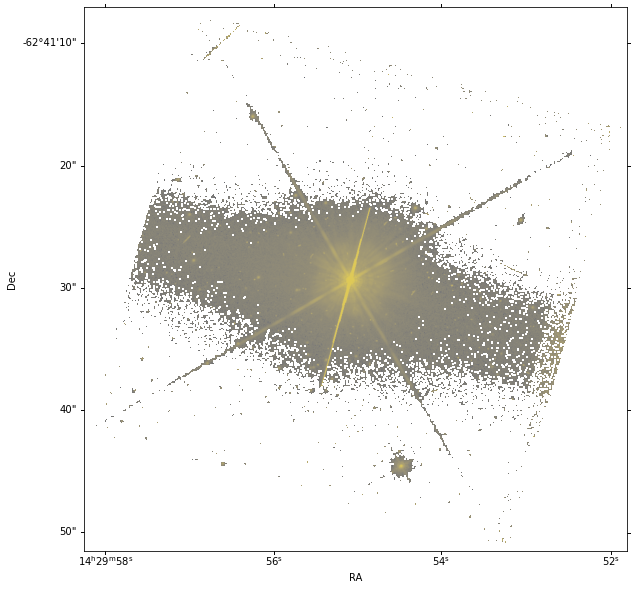

In [140]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=w)
plt.imshow(np.log10(data), origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')

In [144]:
from astropy.stats import sigma_clipped_stats
mean, median, std = sigma_clipped_stats(data, sigma=3.0)  

In [187]:
from photutils.detection import DAOStarFinder
daofind = DAOStarFinder(fwhm=10.0, threshold=5.*std)  
sources = daofind(data - median)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
  

In [188]:
sources.sort('flux')

In [189]:
sources[-1]

id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
int64,float64,float64,float64,float32,float64,int64,float64,float64,float64,float64
83,440.69213,448.30091,0.36344897,0.2491032,0.44258727,169,0,494.58011,2074.9731,-8.2925312


In [190]:
from photutils.aperture import CircularAperture
positions = np.transpose((sources[-1]['xcentroid'], sources[-1]['ycentroid']))
apertures = CircularAperture(positions, r=4.)

/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_88120/3680659511.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data), origin='lower', cmap='cividis', aspect='equal')
/var/folders/6g/wwdtn0b173592x4xsbqc03t80000gn/T/ipykernel_88120/3680659511.py:3: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(data), origin='lower', cmap='cividis', aspect='equal')


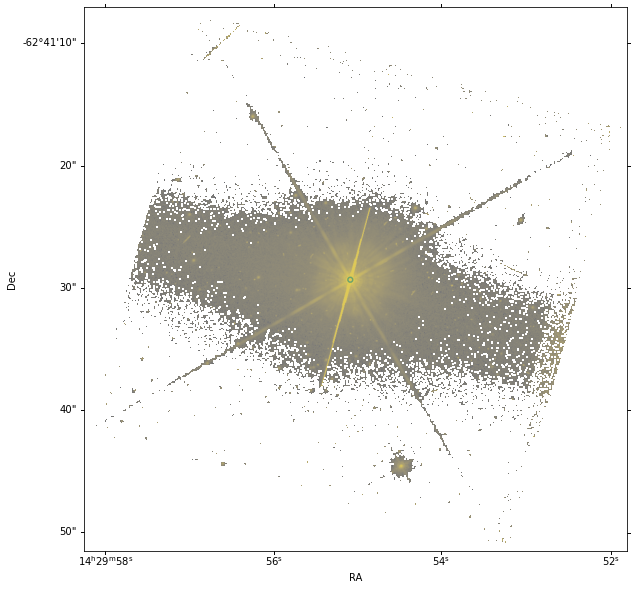

In [196]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(projection=w)
plt.imshow(np.log10(data), origin='lower', cmap='cividis', aspect='equal')
plt.xlabel(r'RA')
plt.ylabel(r'Dec')
apertures.plot(color='teal', lw=1.5, alpha=0.5);

# Exercises
1. Try this on a different star
2. Write a source-finding algorithm from scratch
3. Perform aperture photometry on these sources

# Additional resources
- source-finding resources (like DAOStarfinder, etc.)
- flares resources
- HST resources on diff instruments

# About this Notebook

**Author**: Arjun B. Savel (asavel@umd.edu).

**Last updated**: 2022-08-14

# Citations
If you use `astropy`, `astroquery`, or `numpy` for published research, please cite the
authors. Follow these links for more information about citing `astropy`,
`astroquery`, and `numpy`:

* [Citing `astropy`](https://www.astropy.org/acknowledging.html)
* [Citing `astroquery`](https://astroquery.readthedocs.io/en/latest/#astroquery)
* [Citing `numpy`](https://numpy.org/citing-numpy/)


[Top of Page](#top)<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>
